In [1]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from datetime import datetime
pd.options.display.mpl_style = 'default'
%matplotlib inline
%pylab inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams['figure.dpi'] = 150
#plt.rcParams['figure.figsize'] = 5, 5
#plt.rcParams['savefig.dpi'] = 100

Populating the interactive namespace from numpy and matplotlib


/Users/oryoruk/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/oryoruk/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# An Analysis of Statistics on the Pre-Post Spine Surgery Lecture Survey Results of Neurosurgery Residents at Thomas Jefferson University Hospital

Hi Onur,

 

I got your name from Omar Shah, who said you do work with some of his research.  One of our other physicians, James Harrop, would like some assistance with analysis of some of his data. 

 

Residents were given a survey with thirty simulated cases.  For each case, they determined:

·         If surgical intervention was indicated,

·         If fusion (a type of surgical intervention) was indicated, and

·         If fusion was indicated, how many levels of spine should be fused. 

 

After the survey was complete, the residents participated in a lecture during which Dr. Harrop outlined the latest recommendations for spine surgery.  Two weeks after the lecture, the survey was repeated.

 

We’d like to determine the effectiveness of the intervention.  We were thinking that using the Kappa statistic would be the way to go, but we’d leave it up to your expertise.



Find the data attached.  Please note that I rearranged the questions in between the survey, so you’ll have to go by the Q# in the first row, not the columns in Excel.

Thanks, looking forward to working with you.

In [2]:
!ls

An_Analysis_of_Statistics_on_the_Pre-Post_Spine_Surgery_Lecture_Survey_Results_of_Neurosurgery_Residents_at_Thomas_Jefferson_University_Hospital.ipynb
An_Analysis_of_Statistics_on_the_Pre-Post_Spine_Surgery_Lecture_Survey_Results_of_Neurosurgery_Residents_at_Thomas_Jefferson_University_Hospital_temp.ipynb
Resident Spine Surgery post intervention.xlsx
Resident Spine Surgery pre intervention.xlsx
Untitled.ipynb


In [3]:
pre_data = pd.read_excel('./Resident Spine Surgery pre intervention.xlsx')

In [4]:
post_data = pd.read_excel('./Resident Spine Surgery post intervention.xlsx')

In [5]:
len(pre_data.columns)

139

In [6]:
len(post_data.columns)

139

In [7]:
for i,col in enumerate(pre_data.columns):
    if "Q" not in col:
        print i, col

0 StartDate
1 EndDate
2 Status
3 IPAddress
4 Progress
5 Duration (in seconds)
6 Finished
7 RecordedDate
8 ResponseId
9 RecipientLastName
10 RecipientFirstName
11 RecipientEmail
12 ExternalReference
13 LocationLatitude
14 LocationLongitude
15 DistributionChannel
16 UserLanguage


In [8]:
for i,col in enumerate(post_data.columns):
    if "Q" not in col:
        print i, col

0 StartDate
1 EndDate
2 Status
3 IPAddress
4 Progress
5 Duration (in seconds)
6 Finished
7 RecordedDate
8 ResponseId
9 RecipientLastName
10 RecipientFirstName
11 RecipientEmail
12 ExternalReference
13 LocationLatitude
14 LocationLongitude
15 DistributionChannel
16 UserLanguage


In [9]:
pre_qs = []
for i,col in enumerate(pre_data.columns):
    if "Q" in col:
        #print i, col
        pre_qs.append(str(col))

In [10]:
post_qs= []
for i,col in enumerate(post_data.columns):
    if "Q" in col:
        #print i, col
        post_qs.append(str(col))

In [11]:
len(set(post_qs).union(set(pre_qs)))

122

In [12]:
len(post_qs)

122

## 120 Questions, in Groups of 4, 30 Total Cases, from 15 Neurosurgery residents

## Orders of Questions are Different and Need to be Matched

## Let's take a look at a single user:

In [13]:
for col in pre_data.columns:
    if "Q" in col:
        print col
        print pre_data.ix[0][col]
        print pre_data.ix[2][col]
        print

Q10
Which choice describes you best?
Neurosurgery resident

Q11
What is your current PGY year?
PGY-6

Q187
Is surgical intervention indicated for this patient?
Yes

Q188
Is fusion surgery indicated for this patient?
No

Q189
On a scale of 1 to 10, with 1 being "definitely not indicated" and 10 being "definitely indicated," how indicated is a fusion surgery?
nan

Q190
How many levels will you need to fuse?
nan

Q15
Is surgical intervention indicated for this patient?
Yes

Q16
Is fusion surgery indicated for this patient?
No

Q17
On a scale of 1 to 10, with 1 being "definitely not indicated" and 10 being "definitely indicated," how indicated is a fusion surgery?
nan

Q18
How many levels will you need to fuse?
nan

Q30
Is surgical intervention indicated for this patient?
No

Q31
Is fusion surgery indicated for this patient?
nan

Q32
On a scale of 1 to 10, with 1 being "definitely not indicated" and 10 being "definitely indicated," how indicated is a fusion surgery?
nan

Q33
How many level

In [14]:
q1_ids = []
for col in pre_data.columns:
    if "Q" in col:
        if pre_data.ix[0][col] == 'Is surgical intervention indicated for this patient?':
            #print col
            #print pre_data.ix[0][col]
            #print pre_data.ix[2][col]
            #print
            q1_ids.append(str(col))

In [15]:
q2_ids = []
for col in pre_data.columns:
    if "Q" in col:
        if pre_data.ix[0][col] == 'Is fusion surgery indicated for this patient?':
            q2_ids.append(str(col))

In [16]:
q3_ids = []
for col in pre_data.columns:
    if "Q" in col:
        if pre_data.ix[0][col] == 'On a scale of 1 to 10, with 1 being "definitely not indicated" and 10 being "definitely indicated," how indicated is a fusion surgery?':
            q3_ids.append(str(col))

In [17]:
q4_ids = []
for col in pre_data.columns:
    if "Q" in col:
        if pre_data.ix[0][col] == 'How many levels will you need to fuse?':
            q4_ids.append(str(col))

In [18]:
#sorting them
temp = [int(i_d.strip('Q')) for i_d in q1_ids]
temp.sort()
q1_ids = ['Q'+str(t) for t in temp]

In [19]:
#sorting them
temp = [int(i_d.strip('Q')) for i_d in q2_ids]
temp.sort()
q2_ids = ['Q'+str(t) for t in temp]

In [20]:
#sorting them
temp = [int(i_d.strip('Q')) for i_d in q3_ids]
temp.sort()
q3_ids = ['Q'+str(t) for t in temp]

In [21]:
#sorting them
temp = [int(i_d.strip('Q')) for i_d in q4_ids]
temp.sort()
q4_ids = ['Q'+str(t) for t in temp]

In [22]:
pre_data[q1_ids]

,Q5,Q15,Q30,Q37,Q46,Q55,Q64,Q72,Q80,Q88,Q96,Q103,Q110,Q118,Q125,Q133,Q141,Q150,Q157,Q165,Q173,Q180,Q187,Q194,Q202,Q210,Q217,Q224,Q231,Q239
0,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...
1,"{""ImportId"":""QID5""}","{""ImportId"":""QID15""}","{""ImportId"":""QID30""}","{""ImportId"":""QID37""}","{""ImportId"":""QID46""}","{""ImportId"":""QID55""}","{""ImportId"":""QID64""}","{""ImportId"":""QID72""}","{""ImportId"":""QID80""}","{""ImportId"":""QID88""}","{""ImportId"":""QID96""}","{""ImportId"":""QID103""}","{""ImportId"":""QID110""}","{""ImportId"":""QID118""}","{""ImportId"":""QID125""}","{""ImportId"":""QID133""}","{""ImportId"":""QID141""}","{""ImportId"":""QID150""}","{""ImportId"":""QID157""}","{""ImportId"":""QID165""}","{""ImportId"":""QID173""}","{""ImportId"":""QID180""}","{""ImportId"":""QID187""}","{""ImportId"":""QID194""}","{""ImportId"":""QID202""}","{""ImportId"":""QID210""}","{""ImportId"":""QID217""}","{""ImportId"":""QID224""}","{""ImportId"":""QID231""}","{""ImportId"":""QID239""}"
2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,Yes
3,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No
4,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No
5,NaN,Yes,No,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Yes,No,NaN,NaN,NaN,No,NaN,NaN
6,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,No
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes
8,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No
9,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No


In [23]:
pre_data[q2_ids]

,Q6,Q16,Q31,Q38,Q47,Q56,Q65,Q73,Q81,Q89,Q97,Q104,Q111,Q119,Q126,Q134,Q142,Q151,Q158,Q166,Q174,Q181,Q188,Q195,Q203,Q211,Q218,Q225,Q232,Q240
0,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?
1,"{""ImportId"":""QID6""}","{""ImportId"":""QID16""}","{""ImportId"":""QID31""}","{""ImportId"":""QID38""}","{""ImportId"":""QID47""}","{""ImportId"":""QID56""}","{""ImportId"":""QID65""}","{""ImportId"":""QID73""}","{""ImportId"":""QID81""}","{""ImportId"":""QID89""}","{""ImportId"":""QID97""}","{""ImportId"":""QID104""}","{""ImportId"":""QID111""}","{""ImportId"":""QID119""}","{""ImportId"":""QID126""}","{""ImportId"":""QID134""}","{""ImportId"":""QID142""}","{""ImportId"":""QID151""}","{""ImportId"":""QID158""}","{""ImportId"":""QID166""}","{""ImportId"":""QID174""}","{""ImportId"":""QID181""}","{""ImportId"":""QID188""}","{""ImportId"":""QID195""}","{""ImportId"":""QID203""}","{""ImportId"":""QID211""}","{""ImportId"":""QID218""}","{""ImportId"":""QID225""}","{""ImportId"":""QID232""}","{""ImportId"":""QID240""}"
2,Yes,No,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,Yes
3,NaN,No,NaN,No,NaN,No,Yes,Yes,Yes,No,NaN,No,NaN,NaN,NaN,Yes,No,NaN,Yes,Yes,No,NaN,No,NaN,NaN,NaN,No,NaN,NaN,NaN
4,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN
5,NaN,Yes,NaN,Yes,Yes,Yes,Yes,Yes,NaN,Yes,Yes,No,No,Yes,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Yes,Yes,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,NaN,No,Yes,NaN,Yes,NaN,No,Yes,No,Yes,No,NaN,NaN,NaN,No,NaN,NaN,NaN
7,Yes,No,NaN,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,NaN,Yes,Yes,Yes,NaN,NaN,No,No,No,Yes,NaN,NaN,Yes,Yes,NaN,Yes
8,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,NaN,No,No,Yes,NaN,Yes,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN
9,Yes,No,NaN,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,NaN,Yes,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN


In [24]:
pre_data[q3_ids]

,Q7,Q17,Q32,Q39,Q48,Q57,Q66,Q74,Q82,Q90,Q98,Q105,Q112,Q120,Q127,Q135,Q143,Q152,Q159,Q167,Q175,Q182,Q189,Q196,Q204,Q212,Q219,Q226,Q233,Q241
0,"On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel..."
1,"{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID17_TEXT""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID39_TEXT""}","{""ImportId"":""QID48_TEXT""}","{""ImportId"":""QID57_TEXT""}","{""ImportId"":""QID66_TEXT""}","{""ImportId"":""QID74_TEXT""}","{""ImportId"":""QID82_TEXT""}","{""ImportId"":""QID90_TEXT""}","{""ImportId"":""QID98_TEXT""}","{""ImportId"":""QID105_TEXT""}","{""ImportId"":""QID112_TEXT""}","{""ImportId"":""QID120_TEXT""}","{""ImportId"":""QID127_TEXT""}","{""ImportId"":""QID135_TEXT""}","{""ImportId"":""QID143_TEXT""}","{""ImportId"":""QID152_TEXT""}","{""ImportId"":""QID159_TEXT""}","{""ImportId"":""QID167_TEXT""}","{""ImportId"":""QID175_TEXT""}","{""ImportId"":""QID182_TEXT""}","{""ImportId"":""QID189_TEXT""}","{""ImportId"":""QID196_TEXT""}","{""ImportId"":""QID204_TEXT""}","{""ImportId"":""QID212_TEXT""}","{""ImportId"":""QID219_TEXT""}","{""ImportId"":""QID226_TEXT""}","{""ImportId"":""QID233_TEXT""}","{""ImportId"":""QID241_TEXT""}"
2,10,NaN,NaN,8,10,8,10,10,10,9,NaN,8,NaN,NaN,8,10,8,8,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,10,NaN,10,10,8,10,10,5,10,NaN,4,NaN,5,5,NaN,5,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7,NaN,8,10,8,10,8,NaN,10,6,NaN,NaN,7,8,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,8,NaN,NaN,10,10,10,8,10,10,NaN,NaN,NaN,NaN,7,NaN,10,NaN,NaN,10,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6,NaN,NaN,NaN,7,NaN,7,4,8,8,NaN,6,NaN,NaN,NaN,6,7,7,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,6,NaN,5
8,10,8,NaN,9,7,7,7,8,10,10,NaN,6,NaN,NaN,NaN,NaN,9,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,NaN,NaN,NaN,6,9,7,5,NaN,7,4,NaN,NaN,5,NaN,NaN,6,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
pre_data[q4_ids]

,Q8,Q18,Q33,Q40,Q49,Q58,Q67,Q75,Q83,Q91,Q99,Q106,Q113,Q121,Q128,Q136,Q144,Q153,Q160,Q168,Q176,Q183,Q190,Q197,Q205,Q213,Q220,Q227,Q234,Q242
0,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?,How many levels will you need to fuse?
1,"{""ImportId"":""QID8""}","{""ImportId"":""QID18""}","{""ImportId"":""QID33""}","{""ImportId"":""QID40""}","{""ImportId"":""QID49""}","{""ImportId"":""QID58""}","{""ImportId"":""QID67""}","{""ImportId"":""QID75""}","{""ImportId"":""QID83""}","{""ImportId"":""QID91""}","{""ImportId"":""QID99""}","{""ImportId"":""QID106""}","{""ImportId"":""QID113""}","{""ImportId"":""QID121""}","{""ImportId"":""QID128""}","{""ImportId"":""QID136""}","{""ImportId"":""QID144""}","{""ImportId"":""QID153""}","{""ImportId"":""QID160""}","{""ImportId"":""QID168""}","{""ImportId"":""QID176""}","{""ImportId"":""QID183""}","{""ImportId"":""QID190""}","{""ImportId"":""QID197""}","{""ImportId"":""QID205""}","{""ImportId"":""QID213""}","{""ImportId"":""QID220""}","{""ImportId"":""QID227""}","{""ImportId"":""QID234""}","{""ImportId"":""QID242""}"
2,More than 4 segments,NaN,NaN,1 or 2 segments,1 or 2 segments,1 or 2 segments,More than 4 segments,1 or 2 segments,More than 4 segments,More than 4 segments,NaN,1 or 2 segments,NaN,NaN,1 or 2 segments,3 or 4 segments,More than 4 segments,3 or 4 segments,3 or 4 segments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 or 2 segments
3,NaN,NaN,NaN,NaN,NaN,NaN,1 or 2 segments,1 or 2 segments,1 or 2 segments,NaN,NaN,NaN,NaN,NaN,NaN,3 or 4 segments,NaN,NaN,1 or 2 segments,3 or 4 segments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 or 2 segments,1 or 2 segments,NaN,1 or 2 segments,3 or 4 segments,1 or 2 segments,More than 4 segments,1 or 2 segments,1 or 2 segments,More than 4 segments,NaN,1 or 2 segments,NaN,1 or 2 segments,1 or 2 segments,NaN,1 or 2 segments,3 or 4 segments,3 or 4 segments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1 or 2 segments,NaN,1 or 2 segments,1 or 2 segments,1 or 2 segments,More than 4 segments,3 or 4 segments,NaN,More than 4 segments,1 or 2 segments,NaN,NaN,1 or 2 segments,1 or 2 segments,NaN,3 or 4 segments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3 or 4 segments,1 or 2 segments,NaN,NaN,1 or 2 segments,1 or 2 segments,More than 4 segments,1 or 2 segments,More than 4 segments,More than 4 segments,NaN,NaN,NaN,NaN,1 or 2 segments,NaN,More than 4 segments,NaN,NaN,More than 4 segments,NaN,1 or 2 segments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3 or 4 segments,NaN,NaN,NaN,1 or 2 segments,NaN,More than 4 segments,1 or 2 segments,3 or 4 segments,3 or 4 segments,NaN,1 or 2 segments,3 or 4 segments,NaN,NaN,3 or 4 segments,3 or 4 segments,3 or 4 segments,NaN,NaN,NaN,NaN,NaN,1 or 2 segments,NaN,NaN,3 or 4 segments,1 or 2 segments,NaN,3 or 4 segments
8,1 or 2 segments,1 or 2 segments,NaN,1 or 2 segments,3 or 4 segments,1 or 2 segments,More than 4 segments,1 or 2 segments,3 or 4 segments,More than 4 segments,NaN,

In [26]:
post_data[q1_ids]

,Q5,Q15,Q30,Q37,Q46,Q55,Q64,Q72,Q80,Q88,Q96,Q103,Q110,Q118,Q125,Q133,Q141,Q150,Q157,Q165,Q173,Q180,Q187,Q194,Q202,Q210,Q217,Q224,Q231,Q239
0,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...,Is surgical intervention indicated for this pa...
1,"{""ImportId"":""QID5""}","{""ImportId"":""QID15""}","{""ImportId"":""QID30""}","{""ImportId"":""QID37""}","{""ImportId"":""QID46""}","{""ImportId"":""QID55""}","{""ImportId"":""QID64""}","{""ImportId"":""QID72""}","{""ImportId"":""QID80""}","{""ImportId"":""QID88""}","{""ImportId"":""QID96""}","{""ImportId"":""QID103""}","{""ImportId"":""QID110""}","{""ImportId"":""QID118""}","{""ImportId"":""QID125""}","{""ImportId"":""QID133""}","{""ImportId"":""QID141""}","{""ImportId"":""QID150""}","{""ImportId"":""QID157""}","{""ImportId"":""QID165""}","{""ImportId"":""QID173""}","{""ImportId"":""QID180""}","{""ImportId"":""QID187""}","{""ImportId"":""QID194""}","{""ImportId"":""QID202""}","{""ImportId"":""QID210""}","{""ImportId"":""QID217""}","{""ImportId"":""QID224""}","{""ImportId"":""QID231""}","{""ImportId"":""QID239""}"
2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes,No,Yes,No,No,No,Yes,No,No,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,No
4,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No
5,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,No
6,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,Yes
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,No,No,Yes
8,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,No,Yes,No,No,No
9,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No


In [27]:
post_data[q2_ids]

,Q6,Q16,Q31,Q38,Q47,Q56,Q65,Q73,Q81,Q89,Q97,Q104,Q111,Q119,Q126,Q134,Q142,Q151,Q158,Q166,Q174,Q181,Q188,Q195,Q203,Q211,Q218,Q225,Q232,Q240
0,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?,Is fusion surgery indicated for this patient?
1,"{""ImportId"":""QID6""}","{""ImportId"":""QID16""}","{""ImportId"":""QID31""}","{""ImportId"":""QID38""}","{""ImportId"":""QID47""}","{""ImportId"":""QID56""}","{""ImportId"":""QID65""}","{""ImportId"":""QID73""}","{""ImportId"":""QID81""}","{""ImportId"":""QID89""}","{""ImportId"":""QID97""}","{""ImportId"":""QID104""}","{""ImportId"":""QID111""}","{""ImportId"":""QID119""}","{""ImportId"":""QID126""}","{""ImportId"":""QID134""}","{""ImportId"":""QID142""}","{""ImportId"":""QID151""}","{""ImportId"":""QID158""}","{""ImportId"":""QID166""}","{""ImportId"":""QID174""}","{""ImportId"":""QID181""}","{""ImportId"":""QID188""}","{""ImportId"":""QID195""}","{""ImportId"":""QID203""}","{""ImportId"":""QID211""}","{""ImportId"":""QID218""}","{""ImportId"":""QID225""}","{""ImportId"":""QID232""}","{""ImportId"":""QID240""}"
2,Yes,No,NaN,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,NaN,No,No,Yes,NaN,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No,NaN,NaN,NaN
3,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,No,NaN,NaN,NaN,NaN,No,Yes,No,NaN
4,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,NaN,NaN,Yes,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN
5,Yes,Yes,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,Yes,NaN,Yes,Yes,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN
6,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,NaN,NaN,NaN,No,NaN,NaN,No
7,Yes,Yes,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,NaN,Yes,No,Yes,No,No,NaN,NaN,NaN,NaN,No,NaN,NaN,Yes
8,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,NaN,No,Yes,Yes,No,No,NaN,No,NaN,NaN,Yes,NaN,NaN,No,NaN,NaN,NaN
9,Yes,Yes,NaN,No,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN


In [28]:
q1_pre_perc = []
q2_pre_perc = []
q1_pre_count = []
q2_pre_count = []
for i_d in q1_ids:
    q2i_d = 'Q'+str(int(i_d.strip('Q'))+1)
    print i_d
    q1_yess = 0
    q2_yess = 0
    try:
        q1_yess = pre_data[i_d].value_counts()['Yes']
    except:
        pass
    #print yess
    try:
        q2_yess = pre_data[q2i_d].value_counts()['Yes']
    except:
        pass
    print q1_yess
    print q2_yess
    print q1_yess*100/15.0
    print q2_yess*100/15.0
    q1_pre_count.append(q1_yess)
    q2_pre_count.append(q2_yess)
    q1_pre_perc.append(q1_yess*100/15.0)
    q2_pre_perc.append(q2_yess*100/15.0)

Q5
13
12
86.6666666667
80.0
Q15
15
8
100.0
53.3333333333
Q30
0
0
0.0
0.0
Q37
15
9
100.0
60.0
Q46
10
10
66.6666666667
66.6666666667
Q55
15
13
100.0
86.6666666667
Q64
15
13
100.0
86.6666666667
Q72
15
15
100.0
100.0
Q80
14
13
93.3333333333
86.6666666667
Q88
15
13
100.0
86.6666666667
Q96
13
3
86.6666666667
20.0
Q103
15
5
100.0
33.3333333333
Q110
12
1
80.0
6.66666666667
Q118
12
8
80.0
53.3333333333
Q125
13
5
86.6666666667
33.3333333333
Q133
10
7
66.6666666667
46.6666666667
Q141
14
13
93.3333333333
86.6666666667
Q150
5
5
33.3333333333
33.3333333333
Q157
12
10
80.0
66.6666666667
Q165
6
6
40.0
40.0
Q173
14
0
93.3333333333
0.0
Q180
12
1
80.0
6.66666666667
Q187
12
0
80.0
0.0
Q194
1
1
6.66666666667
6.66666666667
Q202
1
1
6.66666666667
6.66666666667
Q210
0
0
0.0
0.0
Q217
14
1
93.3333333333
6.66666666667
Q224
1
1
6.66666666667
6.66666666667
Q231
0
0
0.0
0.0
Q239
3
2
20.0
13.3333333333


In [29]:
q1_post_perc = []
q2_post_perc = []
q1_post_count = []
q2_post_count = []
for i_d in q1_ids:
    q2i_d = 'Q'+str(int(i_d.strip('Q'))+1)
    print i_d
    q1_yess = 0
    q2_yess = 0
    try:
        q1_yess = post_data[i_d].value_counts()['Yes']
    except:
        pass
    #print yess
    try:
        q2_yess = post_data[q2i_d].value_counts()['Yes']
    except:
        pass
    print q1_yess
    print q2_yess
    print q1_yess*100/15.0
    print q2_yess*100/15.0
    q1_post_count.append(q1_yess)
    q2_post_count.append(q2_yess)
    q1_post_perc.append(q1_yess*100/15.0)
    q2_post_perc.append(q2_yess*100/15.0)

Q5
15
15
100.0
100.0
Q15
15
14
100.0
93.3333333333
Q30
1
0
6.66666666667
0.0
Q37
15
8
100.0
53.3333333333
Q46
15
15
100.0
100.0
Q55
15
15
100.0
100.0
Q64
14
13
93.3333333333
86.6666666667
Q72
15
13
100.0
86.6666666667
Q80
15
15
100.0
100.0
Q88
15
14
100.0
93.3333333333
Q96
15
8
100.0
53.3333333333
Q103
15
10
100.0
66.6666666667
Q110
12
2
80.0
13.3333333333
Q118
13
5
86.6666666667
33.3333333333
Q125
12
3
80.0
20.0
Q133
13
10
86.6666666667
66.6666666667
Q141
11
11
73.3333333333
73.3333333333
Q150
7
6
46.6666666667
40.0
Q157
11
9
73.3333333333
60.0
Q165
8
8
53.3333333333
53.3333333333
Q173
14
2
93.3333333333
13.3333333333
Q180
9
1
60.0
6.66666666667
Q187
9
3
60.0
20.0
Q194
2
2
13.3333333333
13.3333333333
Q202
1
1
6.66666666667
6.66666666667
Q210
0
0
0.0
0.0
Q217
14
0
93.3333333333
0.0
Q224
3
1
20.0
6.66666666667
Q231
1
0
6.66666666667
0.0
Q239
3
2
20.0
13.3333333333


<Container object of 30 artists>

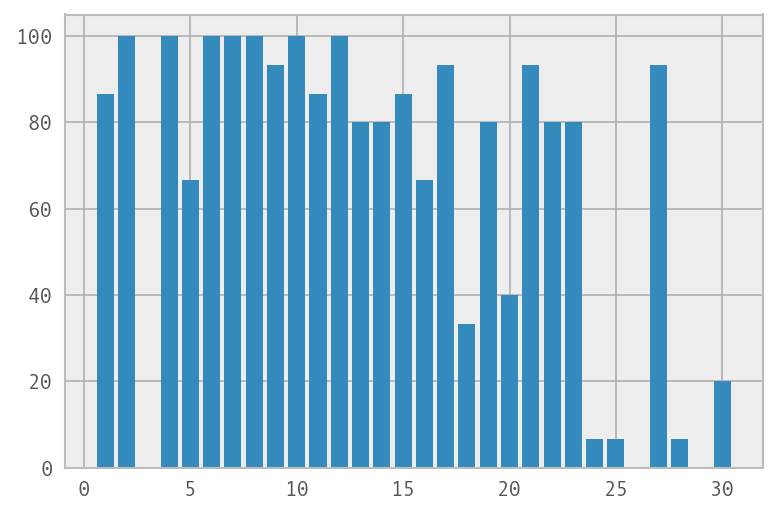

In [30]:
plt.bar(range(1,31),q1_pre_perc)

<Container object of 30 artists>

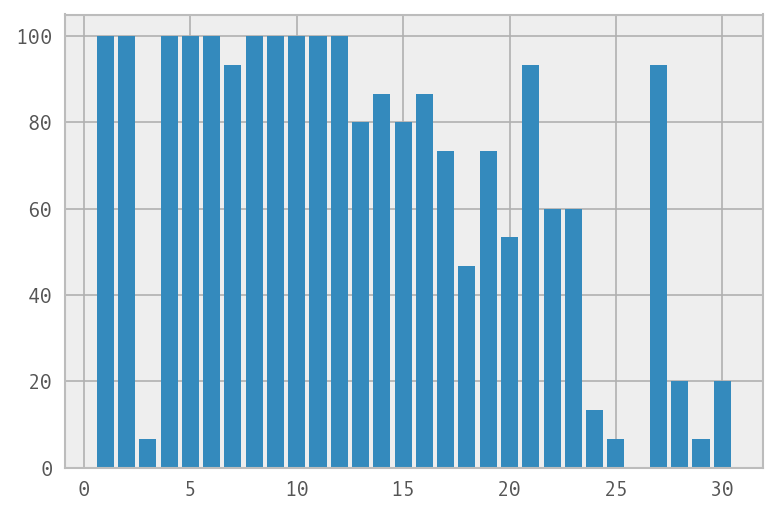

In [31]:
plt.bar(range(1,31),q1_post_perc)

In [32]:
np.arange(1,31)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

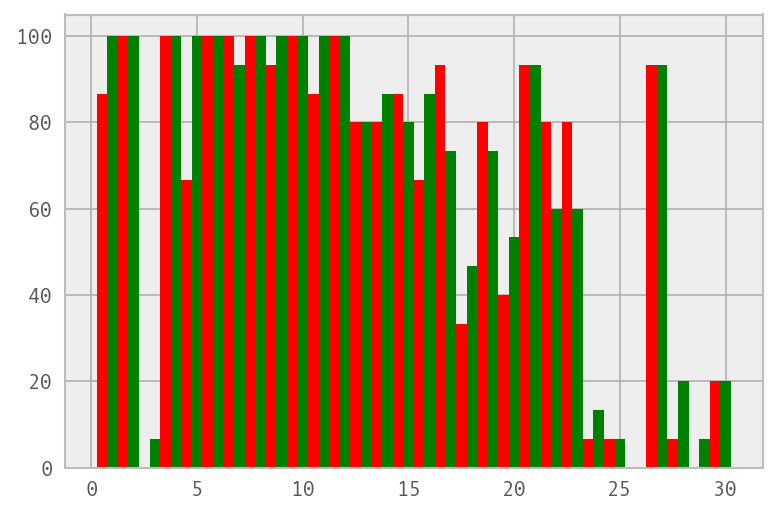

In [33]:
y = [4, 9, 2]
z=[1,2,3]
k=[11,12,13]

x = np.arange(1,31)

ax = plt.subplot(111)
ax.bar(x-0.5, q1_pre_perc,width=0.5,color='r',align='center')
ax.bar(x, q1_post_perc,width=0.5,color='g',align='center')

plt.show()

In [34]:
plt.rcParams['figure.figsize'] = 6,2 

In [35]:
[i[0] + " & " + i[1] for i in zip(q1_ids,q2_ids)]

['Q5 & Q6',
 'Q15 & Q16',
 'Q30 & Q31',
 'Q37 & Q38',
 'Q46 & Q47',
 'Q55 & Q56',
 'Q64 & Q65',
 'Q72 & Q73',
 'Q80 & Q81',
 'Q88 & Q89',
 'Q96 & Q97',
 'Q103 & Q104',
 'Q110 & Q111',
 'Q118 & Q119',
 'Q125 & Q126',
 'Q133 & Q134',
 'Q141 & Q142',
 'Q150 & Q151',
 'Q157 & Q158',
 'Q165 & Q166',
 'Q173 & Q174',
 'Q180 & Q181',
 'Q187 & Q188',
 'Q194 & Q195',
 'Q202 & Q203',
 'Q210 & Q211',
 'Q217 & Q218',
 'Q224 & Q225',
 'Q231 & Q232',
 'Q239 & Q240']

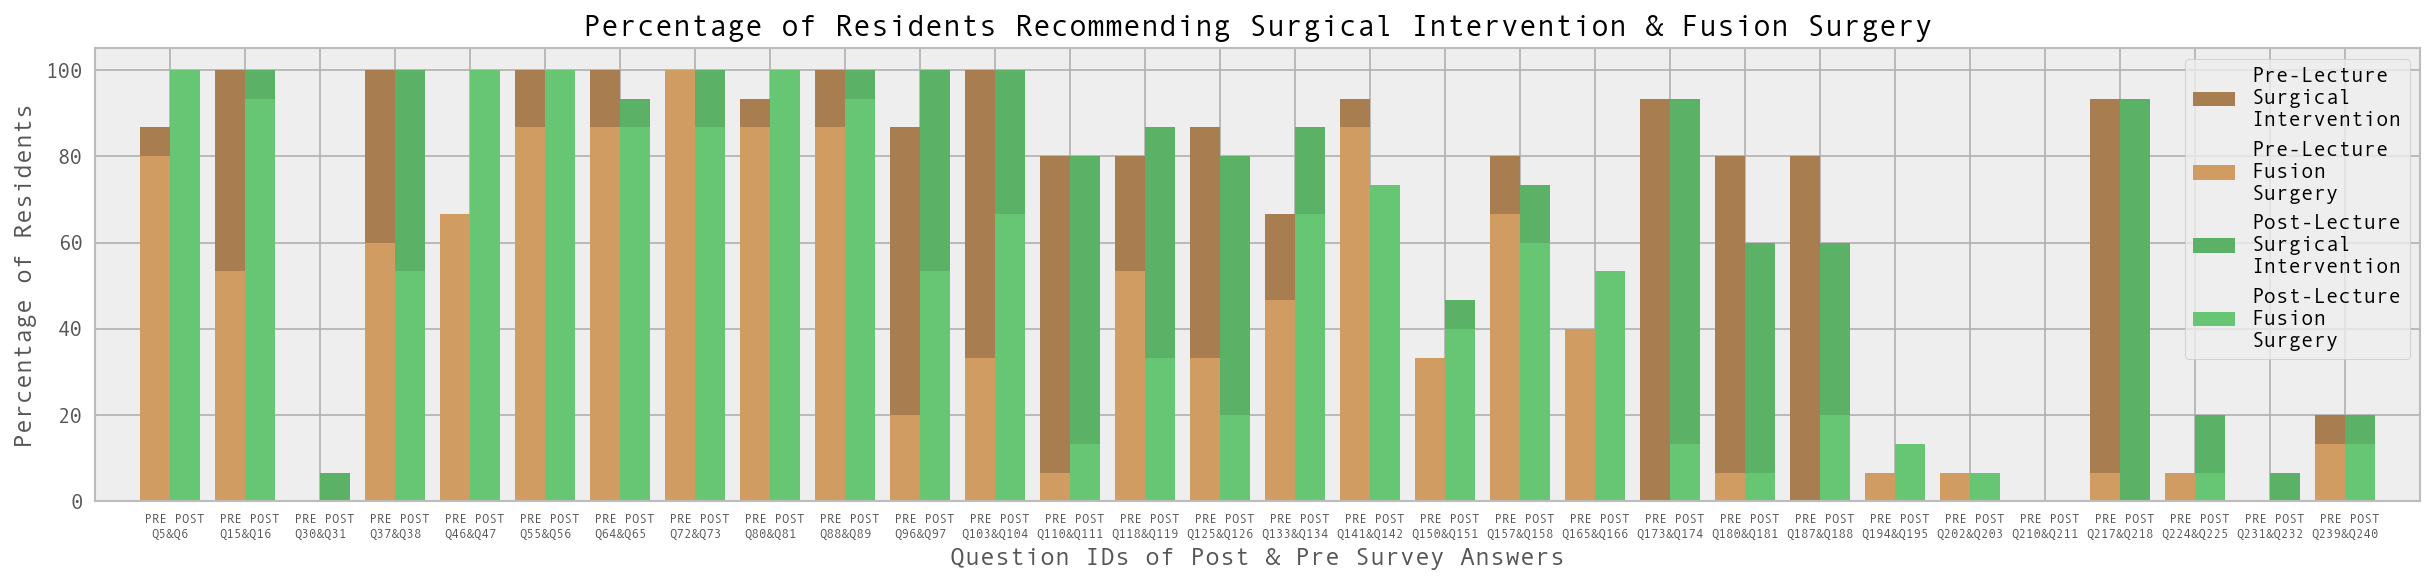

In [36]:
fig = plt.figure(figsize=(20, 4))
x = np.arange(1,31)
cd_bar_list = [plt.bar(x, q1_pre_perc, align='edge',width= -0.4, color = '#a87e50',label = 'Pre-Lecture\nSurgical\nIntervention'), #\nRecommendation Percentage
               plt.bar(x, q2_pre_perc, align='edge',width= -0.4, color = '#d19c62' , label = 'Pre-Lecture\nFusion\nSurgery')]# \nRecommendation Percentage


ab_bar_list = [plt.bar(x, q1_post_perc, align='edge', width= 0.4, color = '#5bb266', label = 'Post-Lecture\nSurgical\nIntervention'),#\nRecommendation Percentage
               plt.bar(x, q2_post_perc, align='edge', width= 0.4, color = '#67c673', label = 'Post-Lecture\nFusion\nSurgery')]#\nRecommendation Percentage
 
plt.xticks(np.arange(1,31),[" PRE POST\n"+i[0] + "&" + i[1]  for i in zip(q1_ids,q2_ids)], size=6)
plt.xlim([0,31])
plt.title('Percentage of Residents Recommending Surgical Intervention & Fusion Surgery')
plt.xlabel('Question IDs of Post & Pre Survey Answers')
plt.ylabel('Percentage of Residents', size = 12)
plt.legend(prop={'size': 10}, loc = 1)

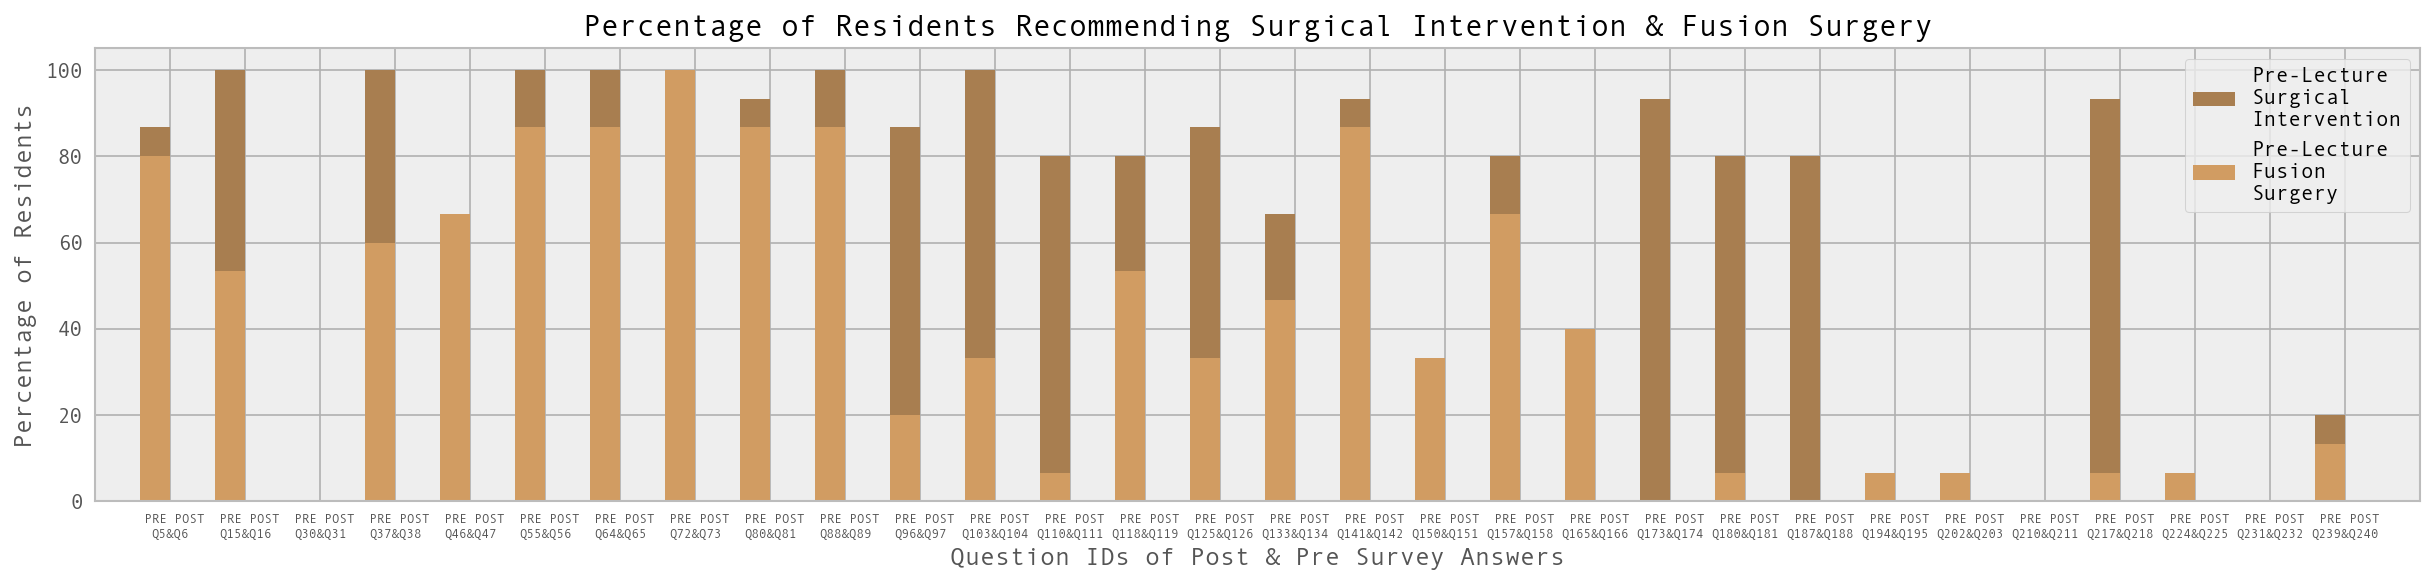

In [37]:
fig = plt.figure(figsize=(20, 4))
x = np.arange(1,31)
cd_bar_list = [plt.bar(x, q1_pre_perc, align='edge',width= -0.4, color = '#a87e50',label = 'Pre-Lecture\nSurgical\nIntervention'), #\nRecommendation Percentage
               plt.bar(x, q2_pre_perc, align='edge',width= -0.4, color = '#d19c62' , label = 'Pre-Lecture\nFusion\nSurgery')]# \nRecommendation Percentage


#ab_bar_list = [plt.bar(x, q1_post_perc, align='edge', width= 0.4, color = '#5bb266', label = 'Post-Lecture\nSurgical\nIntervention'),#\nRecommendation Percentage
#               plt.bar(x, q2_post_perc, align='edge', width= 0.4, color = '#67c673', label = 'Post-Lecture\nFusion\nSurgery')]#\nRecommendation Percentage
 
plt.xticks(np.arange(1,31),[" PRE POST\n"+i[0] + "&" + i[1]  for i in zip(q1_ids,q2_ids)], size=6)
plt.xlim([0,31])
plt.title('Percentage of Residents Recommending Surgical Intervention & Fusion Surgery')
plt.xlabel('Question IDs of Post & Pre Survey Answers')
plt.ylabel('Percentage of Residents', size = 12)
plt.legend(prop={'size': 10}, loc = 1)

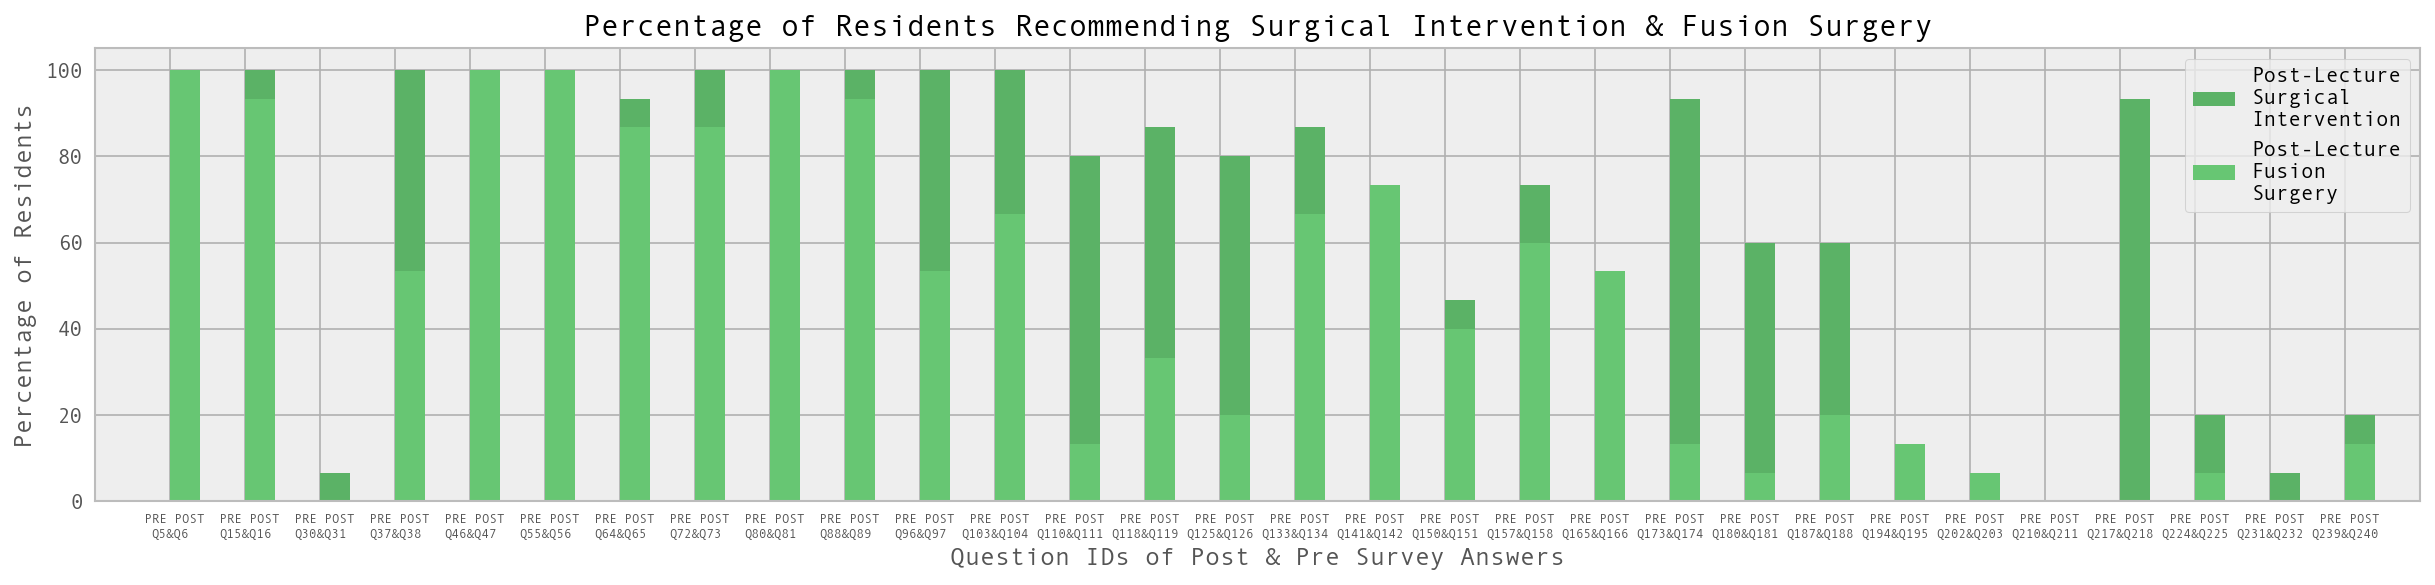

In [38]:
fig = plt.figure(figsize=(20, 4))
x = np.arange(1,31)
#cd_bar_list = [plt.bar(x, q1_pre_perc, align='edge',width= -0.4, color = '#a87e50',label = 'Pre-Lecture\nSurgical\nIntervention'), #\nRecommendation Percentage
 #              plt.bar(x, q2_pre_perc, align='edge',width= -0.4, color = '#d19c62' , label = 'Pre-Lecture\nFusion\nSurgery')]# \nRecommendation Percentage


ab_bar_list = [plt.bar(x, q1_post_perc, align='edge', width= 0.4, color = '#5bb266', label = 'Post-Lecture\nSurgical\nIntervention'),#\nRecommendation Percentage
               plt.bar(x, q2_post_perc, align='edge', width= 0.4, color = '#67c673', label = 'Post-Lecture\nFusion\nSurgery')]#\nRecommendation Percentage
 
plt.xticks(np.arange(1,31),[" PRE POST\n"+i[0] + "&" + i[1]  for i in zip(q1_ids,q2_ids)], size=6)
plt.xlim([0,31])
plt.title('Percentage of Residents Recommending Surgical Intervention & Fusion Surgery')
plt.xlabel('Question IDs of Post & Pre Survey Answers')
plt.ylabel('Percentage of Residents', size = 12)
plt.legend(prop={'size': 10}, loc = 1)

In [39]:
from scipy.stats import chi2_contingency

In [40]:
#chi2, p_val, dof, ex = 
#chi2_contingency(
print "Pre,Post"
temp = map(list, zip(*[q1_pre_count,q1_post_count]))
for i, couple in enumerate(temp):
    print "Q"+str(i+1)+','+str(couple[0])+','+str(couple[1])

Pre,Post
Q1,13,15
Q2,15,15
Q3,0,1
Q4,15,15
Q5,10,15
Q6,15,15
Q7,15,14
Q8,15,15
Q9,14,15
Q10,15,15
Q11,13,15
Q12,15,15
Q13,12,12
Q14,12,13
Q15,13,12
Q16,10,13
Q17,14,11
Q18,5,7
Q19,12,11
Q20,6,8
Q21,14,14
Q22,12,9
Q23,12,9
Q24,1,2
Q25,1,1
Q26,0,0
Q27,14,14
Q28,1,3
Q29,0,1
Q30,3,3


In [41]:
#chi2, p_val, dof, ex = 
#chi2_contingency(
print "Pre,Post"
temp = map(list, zip(*[q2_pre_count,q2_post_count]))
for i, couple in enumerate(temp):
    print "Q"+str(i+1)+','+str(couple[0])+','+str(couple[1])

Pre,Post
Q1,12,15
Q2,8,14
Q3,0,0
Q4,9,8
Q5,10,15
Q6,13,15
Q7,13,13
Q8,15,13
Q9,13,15
Q10,13,14
Q11,3,8
Q12,5,10
Q13,1,2
Q14,8,5
Q15,5,3
Q16,7,10
Q17,13,11
Q18,5,6
Q19,10,9
Q20,6,8
Q21,0,2
Q22,1,1
Q23,0,3
Q24,1,2
Q25,1,1
Q26,0,0
Q27,1,0
Q28,1,1
Q29,0,0
Q30,2,2


In [42]:
pre_data[q3_ids]

,Q7,Q17,Q32,Q39,Q48,Q57,Q66,Q74,Q82,Q90,Q98,Q105,Q112,Q120,Q127,Q135,Q143,Q152,Q159,Q167,Q175,Q182,Q189,Q196,Q204,Q212,Q219,Q226,Q233,Q241
0,"On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel..."
1,"{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID17_TEXT""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID39_TEXT""}","{""ImportId"":""QID48_TEXT""}","{""ImportId"":""QID57_TEXT""}","{""ImportId"":""QID66_TEXT""}","{""ImportId"":""QID74_TEXT""}","{""ImportId"":""QID82_TEXT""}","{""ImportId"":""QID90_TEXT""}","{""ImportId"":""QID98_TEXT""}","{""ImportId"":""QID105_TEXT""}","{""ImportId"":""QID112_TEXT""}","{""ImportId"":""QID120_TEXT""}","{""ImportId"":""QID127_TEXT""}","{""ImportId"":""QID135_TEXT""}","{""ImportId"":""QID143_TEXT""}","{""ImportId"":""QID152_TEXT""}","{""ImportId"":""QID159_TEXT""}","{""ImportId"":""QID167_TEXT""}","{""ImportId"":""QID175_TEXT""}","{""ImportId"":""QID182_TEXT""}","{""ImportId"":""QID189_TEXT""}","{""ImportId"":""QID196_TEXT""}","{""ImportId"":""QID204_TEXT""}","{""ImportId"":""QID212_TEXT""}","{""ImportId"":""QID219_TEXT""}","{""ImportId"":""QID226_TEXT""}","{""ImportId"":""QID233_TEXT""}","{""ImportId"":""QID241_TEXT""}"
2,10,NaN,NaN,8,10,8,10,10,10,9,NaN,8,NaN,NaN,8,10,8,8,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,10,NaN,10,10,8,10,10,5,10,NaN,4,NaN,5,5,NaN,5,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7,NaN,8,10,8,10,8,NaN,10,6,NaN,NaN,7,8,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,8,NaN,NaN,10,10,10,8,10,10,NaN,NaN,NaN,NaN,7,NaN,10,NaN,NaN,10,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6,NaN,NaN,NaN,7,NaN,7,4,8,8,NaN,6,NaN,NaN,NaN,6,7,7,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,6,NaN,5
8,10,8,NaN,9,7,7,7,8,10,10,NaN,6,NaN,NaN,NaN,NaN,9,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7,NaN,NaN,NaN,6,9,7,5,NaN,7,4,NaN,NaN,5,NaN,NaN,6,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
post_data[q3_ids]

,Q7,Q17,Q32,Q39,Q48,Q57,Q66,Q74,Q82,Q90,Q98,Q105,Q112,Q120,Q127,Q135,Q143,Q152,Q159,Q167,Q175,Q182,Q189,Q196,Q204,Q212,Q219,Q226,Q233,Q241
0,"On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel...","On a scale of 1 to 10, with 1 being ""definitel..."
1,"{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID17_TEXT""}","{""ImportId"":""QID32_TEXT""}","{""ImportId"":""QID39_TEXT""}","{""ImportId"":""QID48_TEXT""}","{""ImportId"":""QID57_TEXT""}","{""ImportId"":""QID66_TEXT""}","{""ImportId"":""QID74_TEXT""}","{""ImportId"":""QID82_TEXT""}","{""ImportId"":""QID90_TEXT""}","{""ImportId"":""QID98_TEXT""}","{""ImportId"":""QID105_TEXT""}","{""ImportId"":""QID112_TEXT""}","{""ImportId"":""QID120_TEXT""}","{""ImportId"":""QID127_TEXT""}","{""ImportId"":""QID135_TEXT""}","{""ImportId"":""QID143_TEXT""}","{""ImportId"":""QID152_TEXT""}","{""ImportId"":""QID159_TEXT""}","{""ImportId"":""QID167_TEXT""}","{""ImportId"":""QID175_TEXT""}","{""ImportId"":""QID182_TEXT""}","{""ImportId"":""QID189_TEXT""}","{""ImportId"":""QID196_TEXT""}","{""ImportId"":""QID204_TEXT""}","{""ImportId"":""QID212_TEXT""}","{""ImportId"":""QID219_TEXT""}","{""ImportId"":""QID226_TEXT""}","{""ImportId"":""QID233_TEXT""}","{""ImportId"":""QID241_TEXT""}"
2,9,NaN,NaN,8,10,9,7,NaN,10,10,NaN,8,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,7,NaN,7,5,10,9,8,10,8,9,NaN,NaN,6,6,NaN,10,5,8,9,5,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
4,8,10,NaN,10,10,8,10,10,10,8,5,NaN,NaN,NaN,5,7,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10,10,NaN,NaN,9,10,9,8,10,9,NaN,NaN,NaN,NaN,NaN,10,10,NaN,7,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8,8,NaN,8,9,10,10,9,10,10,6,7,9,8,NaN,NaN,10,6,7,7,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,10,NaN,NaN,7,8,7,8,10,7,NaN,5,NaN,NaN,NaN,NaN,NaN,8,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8,9,8,NaN,9,9,7,9,9,10,8,8,7,NaN,NaN,NaN,8,9,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN
9,8,8,NaN,NaN,8,10,NaN,10,10,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
pre_avgs = []
post_avgs= []
for i_d in q3_ids:
    print i_d
    avg = mean(pre_data[i_d].ix[2:].dropna())
    print avg
    pre_avgs.append(avg)
    avg =  mean(post_data[i_d].ix[2:].dropna())
    print avg
    post_avgs.append(avg)

Q7
8.45454545455
8.57142857143
Q17
8.71428571429
8.61538461538
Q32
nan
nan
Q39
8.55555555556
8.125
Q48
7.8
8.64285714286
Q57
8.83333333333
8.69230769231
Q66
8.66666666667
8.5
Q74
8.23076923077
8.75
Q82
8.83333333333
9.35714285714
Q90
9.08333333333
8.30769230769
Q98
5.0
6.71428571429
Q105
6.8
7.11111111111
Q112
nan
7.0
Q120
6.375
7.0
Q127
6.6
5.5
Q135
7.0
7.66666666667
Q143
8.0
9.2
Q152
6.75
7.5
Q159
7.125
6.57142857143
Q167
9.4
9.14285714286
Q175
nan
5.5
Q182
8.0
5.0
Q189
nan
8.0
Q196
7.0
7.0
Q204
nan
10.0
Q212
nan
nan
Q219
nan
nan
Q226
6.0
6.0
Q233
nan
nan
Q241
6.5
5.0


In [45]:
pre_avgs = np.array(pre_avgs)
mean(pre_avgs[~numpy.isnan(pre_avgs)])

7.6237192100828457

In [46]:
post_avgs = np.array(post_avgs)
mean(post_avgs[~numpy.isnan(post_avgs)])

7.5949293228139387

In [47]:
for i_d in q4_ids:
    print pre_data[i_d].ix[2:].value_counts()
    print post_data[i_d].ix[2:].value_counts()
    print 

1 or 2 segments         5
3 or 4 segments         5
More than 4 segments    2
Name: Q8, dtype: int64
1 or 2 segments         9
3 or 4 segments         5
More than 4 segments    1
Name: Q8, dtype: int64

1 or 2 segments    7
3 or 4 segments    1
Name: Q18, dtype: int64
1 or 2 segments    13
3 or 4 segments     1
Name: Q18, dtype: int64

Series([], Name: Q33, dtype: int64)
Series([], Name: Q33, dtype: int64)

1 or 2 segments    9
Name: Q40, dtype: int64
1 or 2 segments    8
Name: Q40, dtype: int64

1 or 2 segments    8
3 or 4 segments    2
Name: Q49, dtype: int64
1 or 2 segments    11
3 or 4 segments     4
Name: Q49, dtype: int64

1 or 2 segments         11
More than 4 segments     1
3 or 4 segments          1
Name: Q58, dtype: int64
1 or 2 segments         11
3 or 4 segments          3
More than 4 segments     1
Name: Q58, dtype: int64

More than 4 segments    12
1 or 2 segments          1
Name: Q67, dtype: int64
More than 4 segments    9
3 or 4 segments         2
1 or 2 segments       

## Fleiss' Kappa

In [48]:
from statsmodels.stats import inter_rater as ir

In [49]:
def fleiss_kappa(M):
  """
  See `Fleiss' Kappa <https://en.wikipedia.org/wiki/Fleiss%27_kappa>`_.
  :param M: a matrix of shape (:attr:`N`, :attr:`k`) where `N` is the number of subjects and `k` is the number of categories into which assignments are made. `M[i, j]` represent the number of raters who assigned the `i`th subject to the `j`th category.
  :type M: numpy matrix
  """
  N, k = M.shape  # N is # of items, k is # of categories
  n_annotators = float(np.sum(M[0, :]))  # # of annotators

  p = np.sum(M, axis=0) / (N * n_annotators)
  P = (np.sum(M * M, axis=1) - n_annotators) / (n_annotators * (n_annotators - 1))
  Pbar = np.sum(P) / N
  PbarE = np.sum(p * p)

  kappa = (Pbar - PbarE) / (1 - PbarE)

  return kappa
#end def

In [50]:
from nltk import agreement


In [115]:
for i in range(30):
    print pre_data[ (pre_data[q1_ids[i]]=='Yes') & (pre_data[q2_ids[i]].isnull())][[q1_ids[i],q2_ids[i]]]
    #if i ==2: break

Empty DataFrame
Columns: [Q5, Q6]
Index: []
Empty DataFrame
Columns: [Q15, Q16]
Index: []
Empty DataFrame
Columns: [Q30, Q31]
Index: []
Empty DataFrame
Columns: [Q37, Q38]
Index: []
Empty DataFrame
Columns: [Q46, Q47]
Index: []
Empty DataFrame
Columns: [Q55, Q56]
Index: []
Empty DataFrame
Columns: [Q64, Q65]
Index: []
Empty DataFrame
Columns: [Q72, Q73]
Index: []
Empty DataFrame
Columns: [Q80, Q81]
Index: []
Empty DataFrame
Columns: [Q88, Q89]
Index: []
Empty DataFrame
Columns: [Q96, Q97]
Index: []
Empty DataFrame
Columns: [Q103, Q104]
Index: []
Empty DataFrame
Columns: [Q110, Q111]
Index: []
Empty DataFrame
Columns: [Q118, Q119]
Index: []
Empty DataFrame
Columns: [Q125, Q126]
Index: []
Empty DataFrame
Columns: [Q133, Q134]
Index: []
Empty DataFrame
Columns: [Q141, Q142]
Index: []
Empty DataFrame
Columns: [Q150, Q151]
Index: []
Empty DataFrame
Columns: [Q157, Q158]
Index: []
Empty DataFrame
Columns: [Q165, Q166]
Index: []
Empty DataFrame
Columns: [Q173, Q174]
Index: []
Empty DataFrame


In [130]:
for i in range(30):
    print pre_data[ (pre_data[q1_ids[i]].isnull()) & (pre_data[q2_ids[i]].notnull())][[q1_ids[i],q2_ids[i]]]
    #if i ==2: break

Empty DataFrame
Columns: [Q5, Q6]
Index: []
Empty DataFrame
Columns: [Q15, Q16]
Index: []
Empty DataFrame
Columns: [Q30, Q31]
Index: []
Empty DataFrame
Columns: [Q37, Q38]
Index: []
Empty DataFrame
Columns: [Q46, Q47]
Index: []
Empty DataFrame
Columns: [Q55, Q56]
Index: []
Empty DataFrame
Columns: [Q64, Q65]
Index: []
Empty DataFrame
Columns: [Q72, Q73]
Index: []
Empty DataFrame
Columns: [Q80, Q81]
Index: []
Empty DataFrame
Columns: [Q88, Q89]
Index: []
Empty DataFrame
Columns: [Q96, Q97]
Index: []
Empty DataFrame
Columns: [Q103, Q104]
Index: []
Empty DataFrame
Columns: [Q110, Q111]
Index: []
Empty DataFrame
Columns: [Q118, Q119]
Index: []
Empty DataFrame
Columns: [Q125, Q126]
Index: []
Empty DataFrame
Columns: [Q133, Q134]
Index: []
Empty DataFrame
Columns: [Q141, Q142]
Index: []
Empty DataFrame
Columns: [Q150, Q151]
Index: []
Empty DataFrame
Columns: [Q157, Q158]
Index: []
Empty DataFrame
Columns: [Q165, Q166]
Index: []
Empty DataFrame
Columns: [Q173, Q174]
Index: []
Empty DataFrame


In [116]:
for i in range(30):
    print post_data[ (post_data[q1_ids[i]]=='Yes') & (post_data[q2_ids[i]].isnull())][[q1_ids[i],q2_ids[i]]]
    #if i ==2: break

Empty DataFrame
Columns: [Q5, Q6]
Index: []
Empty DataFrame
Columns: [Q15, Q16]
Index: []
Empty DataFrame
Columns: [Q30, Q31]
Index: []
Empty DataFrame
Columns: [Q37, Q38]
Index: []
Empty DataFrame
Columns: [Q46, Q47]
Index: []
Empty DataFrame
Columns: [Q55, Q56]
Index: []
Empty DataFrame
Columns: [Q64, Q65]
Index: []
Empty DataFrame
Columns: [Q72, Q73]
Index: []
Empty DataFrame
Columns: [Q80, Q81]
Index: []
Empty DataFrame
Columns: [Q88, Q89]
Index: []
Empty DataFrame
Columns: [Q96, Q97]
Index: []
Empty DataFrame
Columns: [Q103, Q104]
Index: []
Empty DataFrame
Columns: [Q110, Q111]
Index: []
Empty DataFrame
Columns: [Q118, Q119]
Index: []
Empty DataFrame
Columns: [Q125, Q126]
Index: []
Empty DataFrame
Columns: [Q133, Q134]
Index: []
Empty DataFrame
Columns: [Q141, Q142]
Index: []
Empty DataFrame
Columns: [Q150, Q151]
Index: []
Empty DataFrame
Columns: [Q157, Q158]
Index: []
Empty DataFrame
Columns: [Q165, Q166]
Index: []
Empty DataFrame
Columns: [Q173, Q174]
Index: []
Empty DataFrame


In [131]:
for i in range(30):
    print post_data[ (post_data[q1_ids[i]]=='Yes') & (post_data[q2_ids[i]].isnull())][[q1_ids[i],q2_ids[i]]]
    #if i ==2: break

Empty DataFrame
Columns: [Q5, Q6]
Index: []
Empty DataFrame
Columns: [Q15, Q16]
Index: []
Empty DataFrame
Columns: [Q30, Q31]
Index: []
Empty DataFrame
Columns: [Q37, Q38]
Index: []
Empty DataFrame
Columns: [Q46, Q47]
Index: []
Empty DataFrame
Columns: [Q55, Q56]
Index: []
Empty DataFrame
Columns: [Q64, Q65]
Index: []
Empty DataFrame
Columns: [Q72, Q73]
Index: []
Empty DataFrame
Columns: [Q80, Q81]
Index: []
Empty DataFrame
Columns: [Q88, Q89]
Index: []
Empty DataFrame
Columns: [Q96, Q97]
Index: []
Empty DataFrame
Columns: [Q103, Q104]
Index: []
Empty DataFrame
Columns: [Q110, Q111]
Index: []
Empty DataFrame
Columns: [Q118, Q119]
Index: []
Empty DataFrame
Columns: [Q125, Q126]
Index: []
Empty DataFrame
Columns: [Q133, Q134]
Index: []
Empty DataFrame
Columns: [Q141, Q142]
Index: []
Empty DataFrame
Columns: [Q150, Q151]
Index: []
Empty DataFrame
Columns: [Q157, Q158]
Index: []
Empty DataFrame
Columns: [Q165, Q166]
Index: []
Empty DataFrame
Columns: [Q173, Q174]
Index: []
Empty DataFrame


In [132]:
pre_q1 = pre_data[q1_ids].ix[2:]

In [133]:
pre_q2 = pre_data[q2_ids].ix[2:]

In [134]:
pre_q1 = pre_q1.drop(5)

In [136]:
pre_q2 = pre_q2.drop(5)

In [137]:
pre_q1

,Q5,Q15,Q30,Q37,Q46,Q55,Q64,Q72,Q80,Q88,Q96,Q103,Q110,Q118,Q125,Q133,Q141,Q150,Q157,Q165,Q173,Q180,Q187,Q194,Q202,Q210,Q217,Q224,Q231,Q239
2,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,Yes
3,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No
4,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No
6,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,No
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes
8,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No
9,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No
10,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,No
11,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,No
12,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,No,No


In [138]:
pre_q2

,Q6,Q16,Q31,Q38,Q47,Q56,Q65,Q73,Q81,Q89,Q97,Q104,Q111,Q119,Q126,Q134,Q142,Q151,Q158,Q166,Q174,Q181,Q188,Q195,Q203,Q211,Q218,Q225,Q232,Q240
2,Yes,No,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,Yes
3,NaN,No,NaN,No,NaN,No,Yes,Yes,Yes,No,NaN,No,NaN,NaN,NaN,Yes,No,NaN,Yes,Yes,No,NaN,No,NaN,NaN,NaN,No,NaN,NaN,NaN
4,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN
6,Yes,Yes,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,NaN,No,Yes,NaN,Yes,NaN,No,Yes,No,Yes,No,NaN,NaN,NaN,No,NaN,NaN,NaN
7,Yes,No,NaN,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,NaN,Yes,Yes,Yes,NaN,NaN,No,No,No,Yes,NaN,NaN,Yes,Yes,NaN,Yes
8,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,NaN,No,No,Yes,NaN,Yes,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN
9,Yes,No,NaN,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,NaN,Yes,NaN,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN
10,Yes,Yes,NaN,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,NaN,Yes,Yes,Yes,Yes,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN
11,Yes,Yes,NaN,No,NaN,Yes,No,Yes,Yes,No,No,No,No,Yes,No,NaN,NaN,NaN,Yes,Yes,No,No,No,NaN,NaN,NaN,No,NaN,NaN,NaN
12,Yes,Yes,NaN,Yes,NaN,Yes,Yes,Yes,Yes,Yes,NaN,Yes,No,No,No,Yes,Yes,Yes,Yes,NaN,No,No,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [139]:
post_q1 = post_data[q1_ids].ix[2:]

In [140]:
post_q1 = post_q1.drop(5)

In [141]:
post_q2 = post_data[q2_ids].ix[2:]

In [142]:
post_q2 = post_q2.drop(5)

In [150]:
pre_q2.fillna('No', inplace=True)

In [152]:
post_q2.fillna('No', inplace=True)

In [153]:
pre_q1_counts = []
for i in q1_ids:
    pre_q1_counts.append([len(pre_q1[pre_q1[i]=='Yes']), len(pre_q1[pre_q1[i]=='No'])])
pre_q1_counts

[[13, 1],
 [14, 0],
 [0, 14],
 [14, 0],
 [9, 5],
 [14, 0],
 [14, 0],
 [14, 0],
 [14, 0],
 [14, 0],
 [12, 2],
 [14, 0],
 [11, 3],
 [11, 3],
 [12, 2],
 [10, 4],
 [13, 1],
 [5, 9],
 [12, 2],
 [6, 8],
 [14, 0],
 [12, 2],
 [11, 3],
 [1, 13],
 [1, 13],
 [0, 14],
 [14, 0],
 [1, 13],
 [0, 14],
 [3, 11]]

In [154]:
post_q1_counts = []
for i in q1_ids:
    post_q1_counts.append([len(post_q1[post_q1[i]=='Yes']), len(post_q1[post_q1[i]=='No'])])
post_q1_counts

[[14, 0],
 [14, 0],
 [1, 13],
 [14, 0],
 [14, 0],
 [14, 0],
 [13, 1],
 [14, 0],
 [14, 0],
 [14, 0],
 [14, 0],
 [14, 0],
 [11, 3],
 [12, 2],
 [11, 3],
 [12, 2],
 [10, 4],
 [7, 7],
 [10, 4],
 [7, 7],
 [13, 1],
 [8, 6],
 [8, 6],
 [2, 12],
 [1, 13],
 [0, 14],
 [13, 1],
 [3, 11],
 [1, 13],
 [3, 11]]

In [162]:
pre_q2_counts = []
for i in q2_ids:
    pre_q2_counts.append([len(pre_q2[pre_q2[i]=='Yes']), len(pre_q2[pre_q2[i]=='No'])])
pre_q2_counts

[[12, 2],
 [7, 7],
 [0, 14],
 [8, 6],
 [9, 5],
 [12, 2],
 [12, 2],
 [14, 0],
 [13, 1],
 [12, 2],
 [2, 12],
 [5, 9],
 [1, 13],
 [7, 7],
 [4, 10],
 [7, 7],
 [12, 2],
 [5, 9],
 [10, 4],
 [6, 8],
 [0, 14],
 [1, 13],
 [0, 14],
 [1, 13],
 [1, 13],
 [0, 14],
 [1, 13],
 [1, 13],
 [0, 14],
 [2, 12]]

In [163]:
post_q2_counts = []
for i in q2_ids:
    post_q2_counts.append([len(post_q2[post_q2[i]=='Yes']), len(post_q2[post_q2[i]=='No'])])
post_q2_counts

[[14, 0],
 [13, 1],
 [0, 14],
 [8, 6],
 [14, 0],
 [14, 0],
 [12, 2],
 [12, 2],
 [14, 0],
 [13, 1],
 [8, 6],
 [10, 4],
 [2, 12],
 [5, 9],
 [3, 11],
 [9, 5],
 [10, 4],
 [6, 8],
 [8, 6],
 [7, 7],
 [2, 12],
 [1, 13],
 [3, 11],
 [2, 12],
 [1, 13],
 [0, 14],
 [0, 14],
 [1, 13],
 [0, 14],
 [2, 12]]

In [164]:
ir.fleiss_kappa(pre_q1_counts)

0.60751791088898732

In [165]:
ir.fleiss_kappa(post_q1_counts)

0.53128387112313669

In [166]:
ir.fleiss_kappa(pre_q2_counts)

0.44944467297408519

In [167]:
ir.fleiss_kappa(post_q2_counts)

0.49450148428343876

## Second Look Excluding Maybe's

In [168]:
ls

An_Analysis_of_Statistics_on_the_Pre-Post_Spine_Surgery_Lecture_Survey_Results_of_Neurosurgery_Residents_at_Thomas_Jefferson_University_Hospital (trinity's conflicted copy 2018-11-03).ipynb
An_Analysis_of_Statistics_on_the_Pre-Post_Spine_Surgery_Lecture_Survey_Results_of_Neurosurgery_Residents_at_Thomas_Jefferson_University_Hospital.ipynb
An_Analysis_of_Statistics_on_the_Pre-Post_Spine_Surgery_Lecture_Survey_Results_of_Neurosurgery_Residents_at_Thomas_Jefferson_University_Hospital_temp.ipynb
README.md
Resident Spine Surgery post intervention.xlsx
Resident Spine Surgery pre intervention (1).xlsx
Resident Spine Surgery pre intervention.xlsx
Spine_Resident_Cases-1.docx
answers.xlsx
~$Resident Spine Surgery pre intervention (1).xlsx
~$Resident Spine Surgery pre intervention.xlsx


In [172]:
cq_matches = pd.read_excel('answers.xlsx')

In [173]:
cq_matches.head()

,case,surgery,fusion,Unnamed: 3,q2_id
0,1,y,n,post op infection,Q188
1,2,y,y,ALD above fusion,Q16
2,3,y,n,midline disc,Q31
3,4,y,m,minimal L45 spondy,Q111
4,5,y,y,recurrent L45 stenosis,Q56


In [175]:
set(cq_matches.fusion)

{u'm', u'n', u'y'}

In [176]:
cq_matches[cq_matches.fusion!='m']

,case,surgery,fusion,Unnamed: 3,q2_id
0,1,y,n,post op infection,Q188
1,2,y,y,ALD above fusion,Q16
2,3,y,n,midline disc,Q31
4,5,y,y,recurrent L45 stenosis,Q56
5,6,n,n,discitis,Q195
6,7,y,y,far lat L5S1,Q38
7,8,y,y,l45 spondy,Q119
8,9,y,y,l5s1 recurrent hnp,Q97
9,10,y,n,lumbar stenosis with axial lbp,Q225
10,11,y,y,l34 spondy and stenosis,Q73


In [189]:
yn_q2_ids = cq_matches[cq_matches.fusion!='m'].q2_id
yn_q2_ids = list(yn_q2_ids)
print len(yn_q2_ids)
yn_q2_ids

25


[u'Q188',
 u'Q16',
 u'Q31',
 u'Q56',
 u'Q195',
 u'Q38',
 u'Q119',
 u'Q97',
 u'Q225',
 u'Q73',
 u'Q89',
 u'Q142',
 u'Q47',
 u'Q65',
 u'Q81',
 u'Q218',
 u'Q181',
 u'Q134',
 u'Q174',
 u'Q158',
 u'Q6',
 u'Q166',
 u'Q211',
 u'Q232',
 u'Q240']

In [185]:
pre_q2_counts = []
for i in yn_q2_ids:
    pre_q2_counts.append([len(pre_q2[pre_q2[i]=='Yes']), len(pre_q2[pre_q2[i]=='No'])])
pre_q2_counts

[[0, 14],
 [7, 7],
 [0, 14],
 [12, 2],
 [1, 13],
 [8, 6],
 [7, 7],
 [2, 12],
 [1, 13],
 [14, 0],
 [12, 2],
 [12, 2],
 [9, 5],
 [12, 2],
 [13, 1],
 [1, 13],
 [1, 13],
 [7, 7],
 [0, 14],
 [10, 4],
 [12, 2],
 [6, 8],
 [0, 14],
 [0, 14],
 [2, 12]]

In [186]:
post_q2_counts = []
for i in yn_q2_ids:
    post_q2_counts.append([len(post_q2[post_q2[i]=='Yes']), len(post_q2[post_q2[i]=='No'])])
post_q2_counts

[[3, 11],
 [13, 1],
 [0, 14],
 [14, 0],
 [2, 12],
 [8, 6],
 [5, 9],
 [8, 6],
 [1, 13],
 [12, 2],
 [13, 1],
 [10, 4],
 [14, 0],
 [12, 2],
 [14, 0],
 [0, 14],
 [1, 13],
 [9, 5],
 [2, 12],
 [8, 6],
 [14, 0],
 [7, 7],
 [0, 14],
 [0, 14],
 [2, 12]]

In [187]:
ir.fleiss_kappa(pre_q2_counts)

0.49568111944151239

In [188]:
ir.fleiss_kappa(post_q2_counts)

0.53568772486985183